<a href="https://colab.research.google.com/github/lmariemorales/GLY6932/blob/main/LM_HW2_Landslide_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2: Principal Component Analysis (PCA) on landslide data

The goal of this assignment is to learn to determine covariance between data variables, perform PCA, and interpret principal components.

1. Download landslide data using pandas.  [1 point]

  The dataset can be found here: https://raw.githubusercontent.com/GatorGlaciology/Intro-to-ML-course/main/Complete-data.csv
  
  A description of the data can be found here: https://link.springer.com/article/10.1007/s00500-021-06105-5

  A 1 in the "Landslide" column means there has been a landslide at that location.
2. Make a copy of the landslide dataframe and remove the "Landslide" column using the df.drop() command. Normalize the data by subtracting the mean from each column and dividing by the standard deviation (I said variance in the video, please use standard dev). [1 point]
3. Compute the correlation and covariance matrices of the normalized data using df.corr() and df.cov() (if you normalized correctly, these matrices should be the same). Make a colormap plots of these values using the pandas background_gradient function (https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html). [1 point]
4. Are there any variables that are strongly correlated? [1 point]
5. Apply a PCA and determine the principal components (PCs) using the sklearn PCA fit_transform function (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Leave the n_components argument blank. This will default to keeping all components. [1 point]
6. Make a scatter plot of PC1 vs. PC2. Remember that Python indexes from 0, so you will actually be plotting the 0 and 1 columns against each other. Use a different color for points that have a landslide. Make sure to include a legend. Describe any trends. [2 points]
7. Determined the percent explained variance for each PC using the explained_variance_ratio_ attribute and make a scree plot (this is a plot showing PC# on the x axis and explained variance on the y axis). Label the x and y axes. [2 points]
8. How many PCs would you need to capture at least 90% of the variance? [1 point]



The following Jupyter Books and documentation may be useful for learning the programming components of this assignment:

https://www.tomasbeuzen.com/python-programming-for-data-science/README.html

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://geo-smart.github.io/curriculum-book/Chapter2-DataManipulation/2.9_pca.html



In [120]:
# load libraries
import math
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import pandas as pd
import sklearn as sklearn
from sklearn.decomposition import PCA

In [121]:
plt.rcParams.update({'xtick.top':True,
                     'ytick.right':True,
                     'xtick.minor.visible':True,
                     'ytick.minor.visible':True,
                     'xtick.direction':'in',
                     'ytick.direction':'in'})

In [95]:
url = 'https://raw.githubusercontent.com/GatorGlaciology/Intro-to-ML-course/main/Complete-data.csv'
df = pd.read_csv(url)

In [96]:
ls_copy = df['Landslide'].copy()
df = df.drop('Landslide', axis=1)
normalized_df = (df- (df.mean())) / df.std()

In [98]:
df_corr = normalized_df.corr()
df_cov = normalized_df.cov()
np.allclose(df_corr,df_cov)

True

In [99]:
df_corr.style.background_gradient(cmap='PiYG',vmin=-1,vmax=1).set_caption('Correlation Matrix')


,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
Aspect,1.000000,-0.024232,0.014727,0.017998,0.024295,0.025086,-0.158561,0.168099,-0.043066,-0.010454,-0.015876,0.048420
Curvature,-0.024232,1.000000,-0.049595,0.193843,0.025736,0.058319,0.094625,-0.089028,0.815075,-0.104207,-0.806851,0.143316
Earthquake,0.014727,-0.049595,1.000000,0.071308,0.003382,0.095507,-0.134619,0.118588,-0.022582,0.825169,0.049177,0.055050
Elevation,0.017998,0.193843,0.071308,1.000000,0.026903,0.429702,-0.217003,0.187921,0.104691,-0.003628,-0.228721,0.333029
Flow,0.024295,0.025736,0.003382,0.026903,1.000000,-0.033881,-0.393805,0.462291,0.041163,0.002451,-0.011119,-0.078842
Lithology,0.025086,0.058319,0.095507,0.429702,-0.033881,1.000000,-0.129279,0.119080,0.008051,0.005351,-0.048930,0.169103
NDVI,-0.158561,0.094625,-0.134619,-0.217003,-0.393805,-0.129279,1.000000,-0.931590,0.102043,-0.096063,-0.042720,0.041726
NDWI,0.168099,-0.089028,0.118588,0.187921,0.462291,0.119080,-0.931590,1.000000,-0.097774,0.078201,0.040269,-0.098171
Plan,-0.043066,0.815075,-0.022582,0.104691,0.041163,0.008051,0.102043,-0.097774,1.000000,-0.072768,-0.487539,0.055292
Precipitation,-0.010454,-0.104207,0.825169,-0.003628,0.002451,0.005351,-0.096063,0.078201,-0.072768,1.000000,0.095657,0.002301


In [63]:
print('High correlation (Over 0.7? Reference: https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm):\nCurvature and Curvature plan\nPrecipitation and Earthquake danger\nProfile curvature and Curvature\nNDWI and NDVI')


High correlation (Over 0.7? Reference: https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm):
Curvature and Curvature plan
Precipitation and Earthquake danger
Profile curvature and Curvature
NDWI and NDVI


In [65]:
print('Moderate correlation (0.3<x<0.7):\nElevation and Lithology\nNDWI and Flow\nCurvature plan and Profile curvature\nSlope and Elevation')

Moderate correlation (0.3<x<0.7):
Elevation and Lithology
NDWI and Flow
Curvature plan and Profile curvature
Slope and Elevation


In the recording, the values around 0.5 are also pointed out as highly correlated. However, the reference listed above considers this moderately correlated. I'll put both just in case.

In [100]:
pca = PCA()
pca.fit(normalized_df)

PCA()

In [102]:
PCs = pca.fit_transform(normalized_df)
PCs

array([[ 0.06811835, -1.35436199, -0.37379029, ...,  0.42366099,
         0.37526524,  0.02856033],
       [ 2.82273088, -0.20335105,  1.09048935, ..., -0.71636973,
         0.09374287,  0.19055037],
       [ 1.15937166,  0.80955518,  1.66401675, ...,  0.22469372,
        -0.29728933, -0.45356659],
       ...,
       [ 1.92410806,  1.89621003, -1.20603886, ..., -0.45549745,
         0.11471191, -0.39582077],
       [ 0.55460079, -3.00249023, -1.44749119, ...,  0.4557423 ,
         0.09126701,  0.15708191],
       [ 2.85319068, -1.02466287, -1.78178384, ...,  0.31732687,
        -0.26136247, -0.42059548]])

In [107]:
np.corrcoef(PCs.T) #1s on the diagonal, check

array([[ 1.00000000e+00,  4.47425356e-16, -1.05729599e-16,
        -2.38924370e-16,  1.16694328e-16, -1.53778038e-16,
        -6.11709314e-16, -3.70399109e-16,  3.01350752e-16,
        -8.60949005e-17, -6.41464127e-16, -4.21576617e-16],
       [ 4.47425356e-16,  1.00000000e+00, -3.81538319e-16,
         1.91338198e-16, -3.91434080e-16,  9.22906384e-17,
         1.13375394e-16,  1.31461746e-16,  8.22211859e-17,
         7.79028745e-16, -3.74283992e-17, -9.07206863e-16],
       [-1.05729599e-16, -3.81538319e-16,  1.00000000e+00,
         4.74381576e-16,  2.03372327e-16, -2.07413259e-16,
         2.19826566e-17, -9.08257347e-16, -3.18574873e-16,
         1.30009132e-15, -1.11240850e-15,  9.71015981e-16],
       [-2.38924370e-16,  1.91338198e-16,  4.74381576e-16,
         1.00000000e+00, -1.43679406e-16, -1.58601790e-16,
         3.23901119e-16,  2.34884626e-16, -2.93637260e-16,
        -1.12914288e-15,  3.31208183e-16,  1.08660987e-15],
       [ 1.16694328e-16, -3.91434080e-16,  2.0337232

In [109]:
np.var(PCs[:,0]), np.var(PCs[:,1]), np.var(PCs[:,2]) #decreasing principal components, check

(2.64222382006353, 2.395338177260015, 1.7698709652164715)

In [112]:
pca.explained_variance_ratio_ #maybe the last 3 would be considered noise?

array([0.22036714, 0.19977635, 0.14761104, 0.12163033, 0.08285958,
       0.06800105, 0.05362539, 0.04156415, 0.03949789, 0.01391352,
       0.00588629, 0.00526727])

In [116]:
w = ls_copy == 0
u = ls_copy == 1

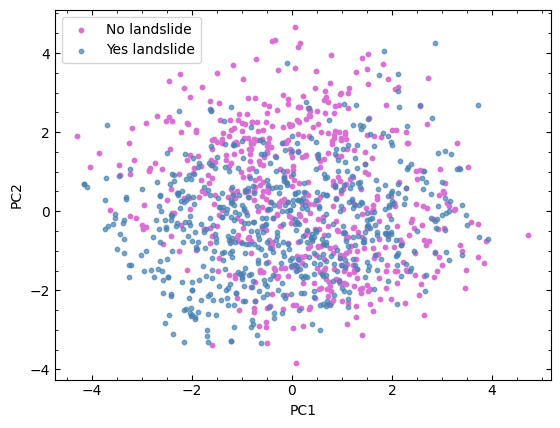

In [136]:
plt.scatter(PCs[:,0][w],PCs[:,1][w],s=10,alpha=1,c='orchid',label='No landslide')
plt.scatter(PCs[:,0][u],PCs[:,1][u],s=10,alpha=0.7,c='steelblue',label='Yes landslide')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend();

There aren't any super strong trends. However, I'm inclined to argue that the data with landslides tend to have lower PC1 and PC2 values on average, as we can see a good amount of points below PC1&PC2 = 0.

In [140]:
#curiosity check
PCs[:,0][w].mean(),PCs[:,1][w].mean()

(0.1824971309124847, 0.3377005063565443)

In [142]:
PCs[:,0][u].mean(),PCs[:,1][u].mean() #This is interesting. Suggests symmetry in the data distribution?

(-0.18249713091248482, -0.3377005063565443)

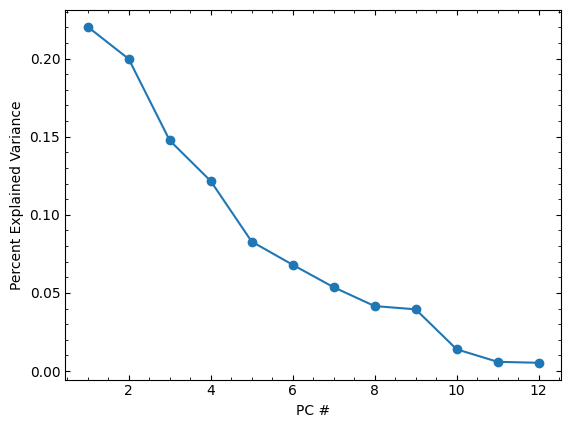

In [153]:
var_ratio = pca.explained_variance_ratio_
x = np.arange(0,12,1) + 1
plt.scatter(x,var_ratio)
plt.plot(x,var_ratio)
plt.xlabel('PC #')
plt.ylabel('Percent Explained Variance');

In [166]:
print(np.sum(var_ratio[0:7]))
print(np.sum(var_ratio[0:8]))
print(f'Number of PCs to reach 90%: {len(var_ratio[0:7])} ~89%')
print(f'If precision matters then.. {len(var_ratio[0:8])} PCs ~94%')

0.8938708692918668
0.9354350229216564
Number of PCs to reach 90%: 7 ~89%
If precision matters then.. 8 PCs ~94%
